In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\benin-malanville.csv")  


In [13]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [12]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [15]:
high_null_cols = df.columns[df.isna().mean() > 0.05]  # List columns with >5% nulls
high_null_cols

Index(['Comments'], dtype='object')

In [80]:
key_vars = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
outliers = df[(df[key_vars].abs() > 3).any(axis=1)]
print(df[key_vars].isna().sum())

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [81]:
outliers = df[(df[key_vars].abs() > 3).any(axis=1)]
print(outliers)

               Timestamp       GHI       DNI       DHI      ModA      ModB  \
670     2021-08-09 11:11  1.798202  0.259113  3.120790  1.658671  1.753090   
671     2021-08-09 11:12  3.120942  2.031302  3.149777  2.978669  3.100487   
672     2021-08-09 11:13  2.106237  0.660702  3.134653  2.002207  2.092072   
673     2021-08-09 11:14  1.443358 -0.154321  3.011143  1.364386  1.433379   
674     2021-08-09 11:15  3.347438  2.310236  3.167421  3.196476  3.325422   
...                  ...       ...       ...       ...       ...       ...   
525141  2022-08-08 16:22 -0.712586 -0.639209 -0.697954 -0.705088 -0.704449   
525142  2022-08-08 16:23 -0.712586 -0.638063 -0.697954 -0.705700 -0.704765   
525143  2022-08-08 16:24 -0.712888 -0.639209 -0.698584 -0.706006 -0.705081   
525151  2022-08-08 16:32 -0.712284 -0.639209 -0.696694 -0.705394 -0.704449   
525155  2022-08-08 16:36 -0.711982 -0.638827 -0.696064 -0.705394 -0.704449   

        Tamb    RH        WS    WSgust  ...  WDstdev   BP  Clea

In [82]:
print(df[key_vars].describe())  # Check standard stats

                GHI           DNI           DHI          ModA          ModB  \
count  5.256000e+05  5.256000e+05  5.256000e+05  5.256000e+05  5.256000e+05   
mean  -4.650432e-18  9.084565e-18  5.191180e-18  9.300864e-18  9.463088e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -7.654356e-01 -6.686307e-01 -8.063408e-01 -7.237487e-01 -7.230881e-01   
25%   -7.325181e-01 -6.407373e-01 -7.401744e-01 -7.237487e-01 -7.230881e-01   
50%   -7.210423e-01 -6.392089e-01 -7.168587e-01 -7.099828e-01 -7.095036e-01   
75%    7.333670e-01  5.617376e-01  6.360858e-01  6.947516e-01  6.919159e-01   
max    3.540715e+00  2.999930e+00  4.057201e+00  3.382468e+00  3.517501e+00   

                 WS        WSgust  
count  5.256000e+05  5.256000e+05  
mean   1.038236e-17  3.093078e-17  
std    1.000001e+00  1.000001e+00  
min   -1.322831e+00 -1.384442e+00  
25%   -6.991816e-01 -7.437690e-01  
50%   -1.378969e-01 -1.030964e-01  
75%    6.104827e-01  6.361411e-01  


In [90]:
print(df[key_vars].max())  # Highest Z-scores
print(df[key_vars].min())  # Lowest Z-scores

GHI        3.540715
DNI        2.999930
DHI        4.057201
ModA       3.382468
ModB       3.517501
WS        10.838337
WSgust    11.724704
dtype: float64
GHI      -0.765436
DNI      -0.668631
DHI      -0.806341
ModA     -0.723749
ModB     -0.723088
WS       -1.322831
WSgust   -1.384442
dtype: float64


In [47]:
df.fillna(df.median(numeric_only=True), inplace=True) # Fill NaN values with median for numeric columns only

In [ ]:
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)
print("Missing values before:", df.isna().sum())
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)
print("Missing values after:", df.isna().sum())
df.ffill(inplace=True)  # Forward fill

Missing values before: Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
z_score               0
month                 0
RH_bins               0
dtype: int64
Missing values after: Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB 

In [ ]:
df.to_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\benin-malanville.csv", index=False)

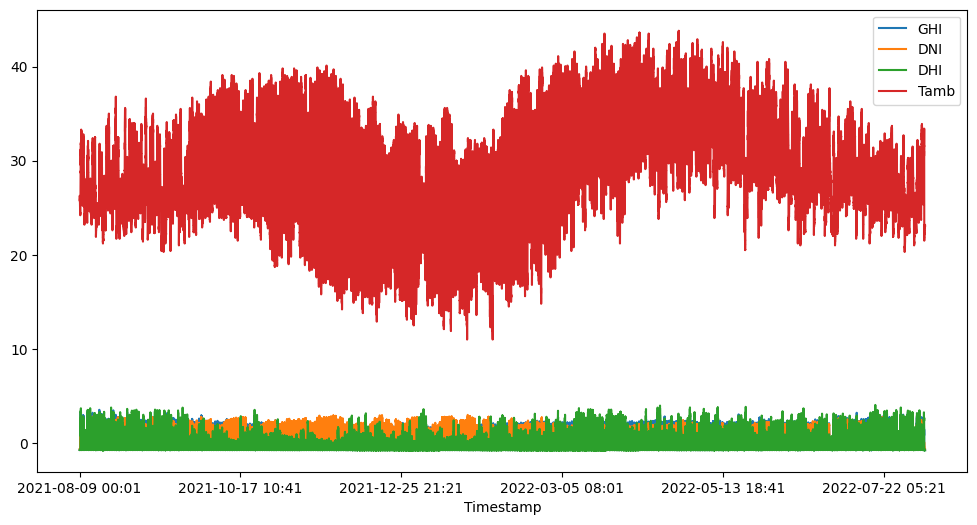

In [ ]:
import matplotlib.pyplot as plt
# Line chart for solar irradiance & temperature trends
df.plot(x="Timestamp", y=["GHI", "DNI", "DHI", "Tamb"], kind="line", figsize=(12, 6))
plt.show()

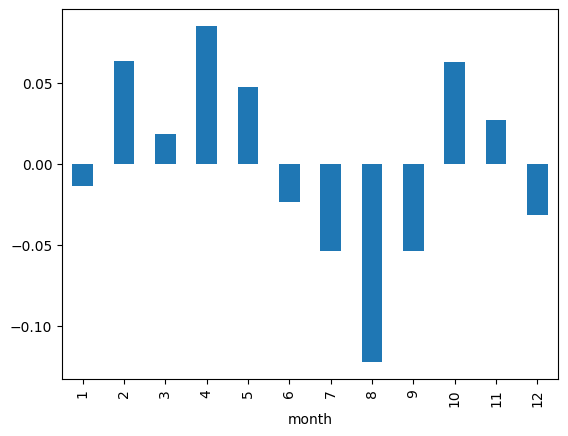

In [55]:
df["month"] = pd.to_datetime(df["Timestamp"]).dt.month
df.groupby("month")["GHI"].mean().plot(kind="bar")
plt.show()

<Axes: xlabel='Cleaning'>

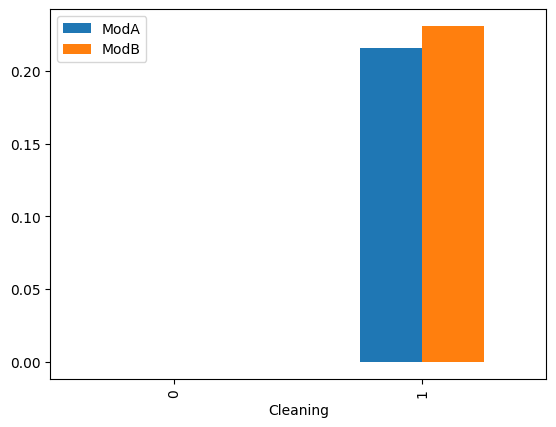

In [57]:
df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind="bar")

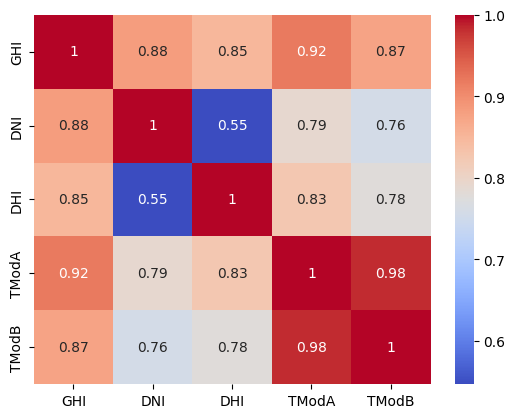

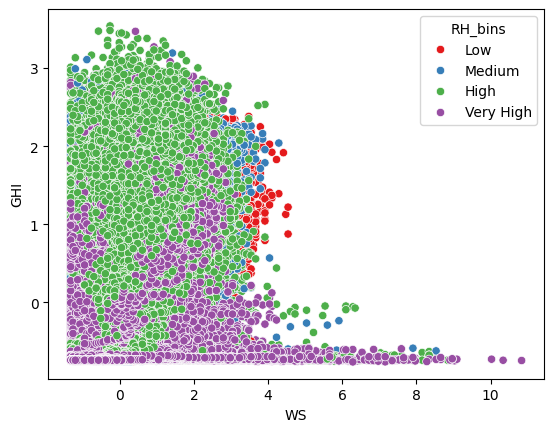

In [62]:
import seaborn as sns
# Heatmap of correlations
sns.heatmap(df[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True, cmap="coolwarm")
plt.show()
# Create discrete bins for RH
df["RH_bins"] = pd.cut(df["RH"], bins=[0, 25, 50, 75, 100], labels=["Low", "Medium", "High", "Very High"])
# Scatter plot with distinct colors
sns.scatterplot(x=df["WS"], y=df["GHI"], hue=df["RH_bins"], palette="Set1")
plt.show()

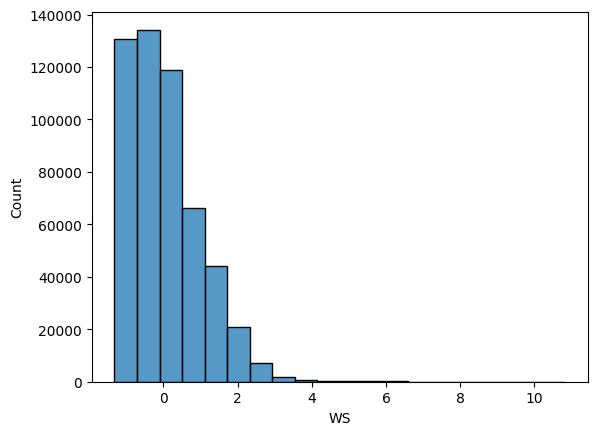

In [ ]:
sns.histplot(df["WS"], bins=20)
plt.show()

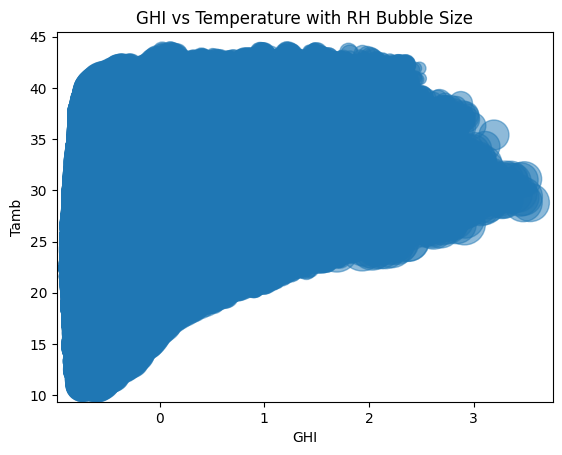

In [76]:
# Bubble chart: GHI vs. Tamb (bubble size = RH)
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"]*10, alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Temperature with RH Bubble Size")
plt.show()